In [9]:
import pandas as pd
df = pd.read_csv('../../dataset/final/merged_dataset_final_all_pp.csv')

In [10]:
import pandas as pd

# Calculate dataset-based thresholds
tp7_threshold = df['tp_7d_cum'].quantile(0.75)      # top 25% cumulative rainfall
tp_lag3_threshold = df['tp_lag3'].quantile(0.25)    # lowest 25% dry period
tp_mm_threshold = df['tp_mm'].quantile(0.75)        # sudden rainfall top 25%
heat_threshold = 27                                   # 9 AM heatwave threshold in KTM
low_n_threshold = df['total_nitrogen'].quantile(0.25)  # low N
low_ph_threshold = df['ph'].quantile(0.25)             # acidic soil

In [11]:
def rice_blast_risk_pct(row):
    risk = 0
    # Temperature favorable
    if 24 <= row['t2m_C'] <= 30:
        risk += 1
    if row['t2m_C'] > heat_threshold:
        risk += 1
    # Rainfall / moisture
    if row['tp_7d_cum'] > tp7_threshold:
        risk += 1
    if row['consec_rain_days'] >= 2:
        risk += 1
    if row['tp_lag3'] < tp_lag3_threshold and row['tp_mm'] > tp_mm_threshold:
        risk += 2  # sudden rain after dry period
    # Soil
    if row['total_nitrogen'] < low_n_threshold:
        risk += 1
    if row['ph'] < low_ph_threshold:
        risk += 1

    # Risk classification
    if risk >= 3:
        return "High"
    elif risk >= 2:
        return "Moderate"
    else:
        return "Low"

In [12]:
# 2️⃣ Bacterial Leaf Blight - percentile-based
def blb_risk_pct(row):
    risk = 0
    if 24 <= row['t2m_C'] <= 34:
        risk += 1
    if row['t2m_C'] > heat_threshold:
        risk += 1
    if row['tp_7d_cum'] > tp7_threshold:
        risk += 1
    if row['consec_rain_days'] >= 2:
        risk += 1
    if row['tp_lag3'] < tp_lag3_threshold and row['tp_mm'] > tp_mm_threshold:
        risk += 2
    if row['total_nitrogen'] < low_n_threshold:
        risk += 1
    if row['ph'] < low_ph_threshold:
        risk += 1

    if risk >= 3:
        return "High"
    elif risk >= 2:
        return "Moderate"
    else:
        return "Low"

In [13]:
# 3️⃣ Sheath Blight - percentile-based
def sheath_blight_risk_pct(row):
    risk = 0
    if row['t2m_C'] >= 24:
        risk += 1
    if row['t2m_C'] > heat_threshold:
        risk += 1
    if row['consec_rain_days'] >= 2:
        risk += 1
    if row['tp_7d_cum'] > tp7_threshold:
        risk += 1
    if row['tp_lag3'] > tp_lag3_threshold:
        risk += 2  # standing water proxy
    if row['total_nitrogen'] < low_n_threshold:
        risk += 1

    if risk >= 3:
        return "High"
    elif risk >= 2:
        return "Moderate"
    else:
        return "Low"

In [ ]:
df['blast_risk'] = df.apply(rice_blast_risk_pct, axis=1)
df['blb_risk'] = df.apply(blb_risk_pct, axis=1)
df['sheath_risk'] = df.apply(sheath_blight_risk_pct, axis=1)

# Composite rice disease risk
def rice_disease_risk_pct(row):
    if "High" in [row['blast_risk'], row['blb_risk'], row['sheath_risk']]:
        return "High"
    elif "Moderate" in [row['blast_risk'], row['blb_risk'], row['sheath_risk']]:
        return "Moderate"
    else:
        return "Low"

df['rice_disease_risk'] = df.apply(rice_disease_risk_pct, axis=1)

In [10]:
df.columns

Index(['latitude', 'longitude', 'nearest_lat', 'nearest_lon', 'distance',
       'year', 'month', 'day', 'tp_mm', 't2m_C', 'anomaly_T2m_C',
       'heat_stress_proxy', 'tp_7d_cum', 'tp_14d_cum', 'tp_7d_avg',
       'consec_rain_days', 'tp_lag1', 'tp_lag3', 'tp_lag7', 'heavy_rain',
       'month_sin', 'month_cos', 'heat_proxy', 'heat_next_day',
       'heat_next_2days', 'heat_next_3days', 'tp_anomaly', 'tp_std_anomaly',
       'heatwave_flag', 'next_day_match', 'next_2days_match',
       'next_3days_match', 'lat', 'lon', 'ph', 'organic_matter',
       'total_nitrogen', 'potassium', 'p2o5', 'boron', 'zinc', 'sand', 'clay',
       'slit', 'parentsoil', 'province', 'district', 'palika', 'crop',
       'variety', 'UREA1', 'UREA2', 'UREA3', 'DAP', 'MOP', 'organic',
       'boron_fert', 'palika_num', 'blast_risk', 'blb_risk', 'sheath_risk',
       'rice_disease_risk'],
      dtype='object')

In [11]:
df.head()

,latitude,longitude,nearest_lat,nearest_lon,distance,year,month,day,tp_mm,t2m_C,...,UREA3,DAP,MOP,organic,boron_fert,palika_num,blast_risk,blb_risk,sheath_risk,rice_disease_risk
0,27.5,85.0,27.652,85.005,0.152082,2021,1,1,0.0,19.51,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
1,27.5,85.0,27.652,85.005,0.152082,2021,1,2,0.0,20.18,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
2,27.5,85.0,27.652,85.005,0.152082,2021,1,3,0.0,20.59,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
3,27.5,85.0,27.652,85.005,0.152082,2021,1,4,0.0,18.81,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
4,27.5,85.0,27.652,85.005,0.152082,2021,1,5,0.0,20.24,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low


In [12]:
# For each disease risk column
columns = ['blast_risk', 'blb_risk', 'sheath_risk', 'rice_disease_risk']

for col in columns:
    print(f"\nCounts for {col}:")
    print(df[col].value_counts())



Counts for blast_risk:
blast_risk
Low         18609
Moderate     5395
High         2471
Name: count, dtype: int64

Counts for blb_risk:
blb_risk
Low         18280
Moderate     5627
High         2568
Name: count, dtype: int64

Counts for sheath_risk:
sheath_risk
Low         10923
High         8299
Moderate     7253
Name: count, dtype: int64

Counts for rice_disease_risk:
rice_disease_risk
Low         10084
High         8703
Moderate     7688
Name: count, dtype: int64


In [13]:
df['tp_7d_cum'].max()

30.55906266

In [14]:
import folium
from IPython.display import display

# Palika-level mean coordinates
palika_coords = df.groupby('palika')[['nearest_lat','nearest_lon']].mean().reset_index()

# Risk counts per Palika
palika_risk = df.groupby('palika')['rice_disease_risk'].value_counts().unstack(fill_value=0).reset_index()

# Merge coordinates and risk
palika_map_df = palika_coords.merge(palika_risk, on='palika', how='left')

# Function to pick color based on risk
def risk_color(risk):
    if risk == 'High':
        return 'red'
    elif risk == 'Moderate':
        return 'orange'
    else:
        return 'green'

# Create Folium map
m = folium.Map(location=[27.7, 85.3], zoom_start=10)

# Add Palika markers
for _, row in palika_map_df.iterrows():
    if row['High'] > 0:
        risk_level = 'High'
    elif row['Moderate'] > 0:
        risk_level = 'Moderate'
    else:
        risk_level = 'Low'
        
    folium.CircleMarker(
        location=[row['nearest_lat'], row['nearest_lon']],
        radius=10,
        color=risk_color(risk_level),
        fill=True,
        fill_color=risk_color(risk_level),
        fill_opacity=0.7,
        popup=f"{row['palika']}\nHigh: {row['High']}, Moderate: {row['Moderate']}, Low: {row['Low']}\nRisk: {risk_level}"
    ).add_to(m)

# Display map directly in notebook
display(m)


In [15]:
df

,latitude,longitude,nearest_lat,nearest_lon,distance,year,month,day,tp_mm,t2m_C,...,UREA3,DAP,MOP,organic,boron_fert,palika_num,blast_risk,blb_risk,sheath_risk,rice_disease_risk
0,27.5,85.0,27.652,85.005,0.152082,2021,1,1,0.0,19.51,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
1,27.5,85.0,27.652,85.005,0.152082,2021,1,2,0.0,20.18,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
2,27.5,85.0,27.652,85.005,0.152082,2021,1,3,0.0,20.59,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
3,27.5,85.0,27.652,85.005,0.152082,2021,1,4,0.0,18.81,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
4,27.5,85.0,27.652,85.005,0.152082,2021,1,5,0.0,20.24,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26470,28.0,86.0,27.892,85.476,0.535014,2025,10,27,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low
26471,28.0,86.0,27.892,85.476,0.535014,2025,10,28,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low
26472,28.0,86.0,27.892,85.476,0.535014,2025,10,29,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low
26473,28.0,86.0,27.892,85.476,0.535014,2025,10,30,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low


In [16]:
for col in df.columns:
    print(f"{col}: {df[col].max()}")


latitude: 28.0
longitude: 86.0
nearest_lat: 27.894
nearest_lon: 85.957
distance: 0.9064325678173808
year: 2025
month: 12
day: 31
tp_mm: 15.577793
t2m_C: 35.37
anomaly_T2m_C: 16.552525812945714
heat_stress_proxy: 1
tp_7d_cum: 30.55906266
tp_14d_cum: 44.5885656
tp_7d_avg: 4.36558038
consec_rain_days: 7
tp_lag1: 15.577793
tp_lag3: 15.577793
tp_lag7: 15.577793
heavy_rain: 1
month_sin: 1.0
month_cos: 1.0
heat_proxy: 1
heat_next_day: 1
heat_next_2days: 1
heat_next_3days: 1
tp_anomaly: 14.652771112040922
tp_std_anomaly: 19.85568564291748
heatwave_flag: 1
next_day_match: True
next_2days_match: True
next_3days_match: True
lat: 27.894
lon: 85.957
ph: 6.23
organic_matter: 5.24
total_nitrogen: 0.24
potassium: 395.73
p2o5: 246.53
boron: 1.3
zinc: 2.75
sand: 57.16
clay: 29.74
slit: 56.61
parentsoil: 3.0
province: Bagmati
district: Sindhupalchok
palika: Tripurasundari Gaunpalika
crop: 0.0
variety: 1.0
UREA1: 2.21
UREA2: 3.62
UREA3: 3.62
DAP: 3.62
MOP: 3.34
organic: 6.0
boron_fert: 1.0
palika_num: 15.

In [17]:
df

,latitude,longitude,nearest_lat,nearest_lon,distance,year,month,day,tp_mm,t2m_C,...,UREA3,DAP,MOP,organic,boron_fert,palika_num,blast_risk,blb_risk,sheath_risk,rice_disease_risk
0,27.5,85.0,27.652,85.005,0.152082,2021,1,1,0.0,19.51,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
1,27.5,85.0,27.652,85.005,0.152082,2021,1,2,0.0,20.18,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
2,27.5,85.0,27.652,85.005,0.152082,2021,1,3,0.0,20.59,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
3,27.5,85.0,27.652,85.005,0.152082,2021,1,4,0.0,18.81,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
4,27.5,85.0,27.652,85.005,0.152082,2021,1,5,0.0,20.24,...,1.93,0.54,1.67,6.0,1.0,1.0,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26470,28.0,86.0,27.892,85.476,0.535014,2025,10,27,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low
26471,28.0,86.0,27.892,85.476,0.535014,2025,10,28,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low
26472,28.0,86.0,27.892,85.476,0.535014,2025,10,29,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low
26473,28.0,86.0,27.892,85.476,0.535014,2025,10,30,0.0,14.62,...,1.81,2.17,1.67,6.0,1.0,NaN,Low,Low,Low,Low


In [18]:
df.drop(columns='palika_num', inplace=True)
df.drop(columns='district', inplace=True)
df.drop(columns='province', inplace=True)
df.drop(columns='palika', inplace=True)




In [19]:
null_cols = df.columns[df.isnull().any()]
df[null_cols].isnull().sum()


Series([], dtype: float64)

In [20]:
df.dtypes

latitude             float64
longitude            float64
nearest_lat          float64
nearest_lon          float64
distance             float64
year                   int64
month                  int64
day                    int64
tp_mm                float64
t2m_C                float64
anomaly_T2m_C        float64
heat_stress_proxy      int64
tp_7d_cum            float64
tp_14d_cum           float64
tp_7d_avg            float64
consec_rain_days       int64
tp_lag1              float64
tp_lag3              float64
tp_lag7              float64
heavy_rain             int64
month_sin            float64
month_cos            float64
heat_proxy             int64
heat_next_day          int64
heat_next_2days        int64
heat_next_3days        int64
tp_anomaly           float64
tp_std_anomaly       float64
heatwave_flag          int64
next_day_match          bool
next_2days_match        bool
next_3days_match        bool
lat                  float64
lon                  float64
ph            

In [21]:
# from sklearn.preprocessing import StandardScaler

# # Separate features and scale numeric columns
# X = df.drop(columns=risk_cols)
# y_dict = {col: df[col] for col in risk_cols}  # store y separately

# numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
# scaler = StandardScaler()
# X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [22]:
# from sklearn.model_selection import train_test_split

# # Use same split for all three diseases
# X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, shuffle=True)

# y_train_dict = {}
# y_test_dict = {}
# for col in risk_cols:
#     y_train_dict[col], y_test_dict[col] = train_test_split(
#         y_dict[col], test_size=0.2, random_state=42, stratify=y_dict[col]
#     )


In [23]:
# from sklearn.ensemble import RandomForestClassifier

# rf_models = {}
# for col in risk_cols:
#     print(f"\n=== Training for {col} ===")
#     rf = RandomForestClassifier(
#         n_estimators=500,  # more trees for better training
#         max_depth=None,    # let it grow fully
#         random_state=42,
#         class_weight='balanced'
#     )
#     rf.fit(X_train, y_train_dict[col])
#     rf_models[col] = rf


In [24]:
# from sklearn.metrics import classification_report

# for col in risk_cols:
#     y_pred = rf_models[col].predict(X_test)
#     print(f"\n=== Classification Report for {col} ===")
#     print(classification_report(y_test_dict[col], y_pred))


=== Classification Report for blast_risk ===
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      3722
           1       0.18      0.03      0.05      1079
           2       0.16      0.01      0.03       494

    accuracy                           0.68      5295
   macro avg       0.35      0.33      0.30      5295
weighted avg       0.55      0.68      0.58      5295


=== Classification Report for blb_risk ===
              precision    recall  f1-score   support

           0       0.69      0.96      0.80      3656
           1       0.21      0.03      0.05      1125
           2       0.12      0.01      0.02       514

    accuracy                           0.67      5295
   macro avg       0.34      0.33      0.29      5295
weighted avg       0.53      0.67      0.57      5295


=== Classification Report for sheath_risk ===
              precision    recall  f1-score   support

           0       0.41      0.57      0.48      2185
           1       0.28      0.19      0.23      1450
           2       0.33      0.25      0.29      1660

    accuracy                           0.37      5295
   macro avg       0.34      0.34      0.33      5295
weighted avg       0.35      0.37      0.35      5295


=== Classification Report for rice_disease_risk ===
              precision    recall  f1-score   support

           0       0.36      0.46      0.41      2017
           1       0.28      0.21      0.24      1538
           2       0.33      0.30      0.31      1740

    accuracy                           0.33      5295
   macro avg       0.32      0.32      0.32      5295
weighted avg       0.33      0.33      0.33      5295

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

safe_features = [
    'latitude', 'longitude', 'nearest_lat', 'nearest_lon', 'distance',
    'year', 'month', 'day',
    'tp_mm', 't2m_C',
    'ph', 'organic_matter', 'total_nitrogen', 'potassium', 'p2o5',
    'boron', 'zinc', 'sand', 'clay', 'slit', 'parentsoil',
    'crop', 'variety',
    'UREA1', 'UREA2', 'UREA3', 'DAP', 'MOP', 'organic', 'boron_fert'
]

X = df[safe_features]

# Identify numeric features for scaling
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

def train_disease_model(X, y, disease_name, n_splits=5):
    print(f"\n=== Training for {disease_name} ===\n")
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    acc_list = []
    f1_list = []
    
    fold = 1
    for train_idx, test_idx in skf.split(X, y):
        print(f"--- Fold {fold} ---")
        fold += 1
        
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Scale numeric features
        scaler = StandardScaler()
        X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
        X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
        
        # SMOTE on training set only
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        # Random Forest
        rf = RandomForestClassifier(
            n_estimators=300,
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=5,
            class_weight='balanced',
            random_state=42
        )
        rf.fit(X_train_res, y_train_res)
        
        y_pred = rf.predict(X_test)
        
        # Metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        acc_list.append(acc)
        f1_list.append(f1)
        
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {acc:.4f} | Weighted F1: {f1:.4f}\n")
    
    print(f"=== {disease_name} Summary ===")
    print(f"Mean Accuracy: {np.mean(acc_list):.4f}")
    print(f"Mean Weighted F1: {np.mean(f1_list):.4f}\n")
    
    # Train final model on full dataset
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    
    rf_final = RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42
    )
    rf_final.fit(X_res, y_res)
    
    return rf_final

# -------- Train models for the three diseases --------
diseases = ['blast_risk', 'blb_risk', 'sheath_risk']
models = {}

for disease in diseases:
    y = df[disease]
    models[disease] = train_disease_model(X, y, disease)



=== Training for blast_risk ===

--- Fold 1 ---
              precision    recall  f1-score   support

        High       0.69      0.83      0.75       494
         Low       0.97      0.89      0.93      3722
    Moderate       0.64      0.76      0.70      1079

    accuracy                           0.86      5295
   macro avg       0.77      0.83      0.79      5295
weighted avg       0.88      0.86      0.86      5295

Accuracy: 0.8574 | Weighted F1: 0.8636

--- Fold 2 ---
              precision    recall  f1-score   support

        High       0.68      0.83      0.75       494
         Low       0.97      0.89      0.93      3722
    Moderate       0.65      0.76      0.70      1079

    accuracy                           0.86      5295
   macro avg       0.77      0.83      0.79      5295
weighted avg       0.88      0.86      0.87      5295

Accuracy: 0.8604 | Weighted F1: 0.8665

--- Fold 3 ---
              precision    recall  f1-score   support

        High       0.69 

C:\Users\Acer\AppData\Local\Temp\ipykernel_32448\218778903.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])



=== Training for blb_risk ===

--- Fold 1 ---
              precision    recall  f1-score   support

        High       0.70      0.81      0.75       513
         Low       0.97      0.89      0.93      3656
    Moderate       0.65      0.79      0.71      1126

    accuracy                           0.86      5295
   macro avg       0.78      0.83      0.80      5295
weighted avg       0.88      0.86      0.87      5295

Accuracy: 0.8597 | Weighted F1: 0.8659

--- Fold 2 ---
              precision    recall  f1-score   support

        High       0.72      0.83      0.77       513
         Low       0.97      0.90      0.93      3656
    Moderate       0.68      0.80      0.73      1126

    accuracy                           0.87      5295
   macro avg       0.79      0.84      0.81      5295
weighted avg       0.89      0.87      0.88      5295

Accuracy: 0.8710 | Weighted F1: 0.8759

--- Fold 3 ---
              precision    recall  f1-score   support

        High       0.71   

C:\Users\Acer\AppData\Local\Temp\ipykernel_32448\218778903.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])



=== Training for sheath_risk ===

--- Fold 1 ---
              precision    recall  f1-score   support

        High       0.73      0.86      0.79      1659
         Low       0.84      0.69      0.76      2185
    Moderate       0.63      0.66      0.65      1451

    accuracy                           0.74      5295
   macro avg       0.73      0.74      0.73      5295
weighted avg       0.75      0.74      0.74      5295

Accuracy: 0.7362 | Weighted F1: 0.7359

--- Fold 2 ---
              precision    recall  f1-score   support

        High       0.72      0.86      0.78      1660
         Low       0.84      0.69      0.76      2185
    Moderate       0.64      0.67      0.65      1450

    accuracy                           0.74      5295
   macro avg       0.73      0.74      0.73      5295
weighted avg       0.75      0.74      0.74      5295

Accuracy: 0.7354 | Weighted F1: 0.7353

--- Fold 3 ---
              precision    recall  f1-score   support

        High       0.73

C:\Users\Acer\AppData\Local\Temp\ipykernel_32448\218778903.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


=== Training for sheath_risk ===

--- Fold 1 ---
              precision    recall  f1-score   support

        High       0.73      0.86      0.79      1659
         Low       0.84      0.69      0.76      2185
    Moderate       0.63      0.66      0.65      1451

    accuracy                           0.74      5295
   macro avg       0.73      0.74      0.73      5295
weighted avg       0.75      0.74      0.74      5295

Accuracy: 0.7362 | Weighted F1: 0.7359

--- Fold 2 ---
              precision    recall  f1-score   support

        High       0.72      0.86      0.78      1660
         Low       0.84      0.69      0.76      2185
    Moderate       0.64      0.67      0.65      1450

    accuracy                           0.74      5295
   macro avg       0.73      0.74      0.73      5295
weighted avg       0.75      0.74      0.74      5295

Accuracy: 0.7354 | Weighted F1: 0.7353

--- Fold 3 ---
              precision    recall  f1-score   support

        High       0.73      0.87      0.79      1660
         Low       0.84      0.71      0.77      2185
    Moderate       0.64      0.66      0.65      1450

    accuracy                           0.74      5295
   macro avg       0.74      0.74      0.74      5295
weighted avg       0.75      0.74      0.74      5295

Accuracy: 0.7447 | Weighted F1: 0.7444

--- Fold 4 ---
              precision    recall  f1-score   support

        High       0.74      0.88      0.80      1660
         Low       0.84      0.70      0.76      2184
    Moderate       0.63      0.66      0.64      1451

    accuracy                           0.74      5295
   macro avg       0.74      0.74      0.74      5295
weighted avg       0.75      0.74      0.74      5295

Accuracy: 0.7420 | Weighted F1: 0.7415

--- Fold 5 ---
              precision    recall  f1-score   support

        High       0.72      0.87      0.79      1660
         Low       0.83      0.68      0.75      2184
    Moderate       0.62      0.65      0.64      1451

    accuracy                           0.73      5295
   macro avg       0.73      0.73      0.73      5295
weighted avg       0.74      0.73      0.73      5295

Accuracy: 0.7328 | Weighted F1: 0.7323

=== sheath_risk Summary ===
Mean Accuracy: 0.7382
Mean Weighted F1: 0.7379

C:\Users\Acer\AppData\Local\Temp\ipykernel_17764\218778903.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [26]:
import joblib
for disease, model in models.items():
    joblib.dump(model, f"../../models/{disease}_model.pkl")
    print(f"✅ Saved {disease} model to models/{disease}_model.pkl")

✅ Saved blast_risk model to models/blast_risk_model.pkl
✅ Saved blb_risk model to models/blb_risk_model.pkl
✅ Saved sheath_risk model to models/sheath_risk_model.pkl


In [28]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Save models and corresponding scalers
for disease, model in models.items():
    # Fit scaler on full dataset for consistency
    scaler = StandardScaler()
    scaler.fit(X[numeric_cols])
    
    # Save both
    # joblib.dump(model, f"models/{disease}_model.pkl")
    joblib.dump(scaler, f"../../models/disease_risk/{disease}_scaler.pkl")
    
    print(f"✅ Saved {disease} model and scaler to 'models/'")

✅ Saved blast_risk model and scaler to 'models/'
✅ Saved blb_risk model and scaler to 'models/'
✅ Saved sheath_risk model and scaler to 'models/'


*********************Algorithm Comparision

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd


In [30]:
models_to_compare = {
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=15, min_samples_split=10,
        min_samples_leaf=5, class_weight='balanced', random_state=42),
    
    "XGBoost": XGBClassifier(
        n_estimators=300, max_depth=10, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1),
    
    "LightGBM": LGBMClassifier(
        n_estimators=300, max_depth=10, learning_rate=0.1,
        class_weight='balanced', random_state=42),
    
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300, max_depth=5, random_state=42)
}


In [34]:
from sklearn.preprocessing import LabelEncoder  
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

numeric_cols = df[safe_features].select_dtypes(include=['float64', 'int64']).columns

for disease in ['blast_risk', 'blb_risk', 'sheath_risk']:
    print(f"\n=== Evaluating for {disease} ===")
    
    X = df[safe_features]
    y = df[disease].copy()
    
    # Encode string labels -> numeric
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    for model_name, model in models_to_compare.items():
        pipeline = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('model', model)
        ])
        
        acc_scores = cross_val_score(pipeline, X, y_encoded, cv=skf, scoring='accuracy', n_jobs=-1)
        f1_scores = cross_val_score(pipeline, X, y_encoded, cv=skf, scoring='f1_weighted', n_jobs=-1)
        
        results.append({
            'Disease': disease,
            'Model': model_name,
            'Mean Accuracy': np.mean(acc_scores),
            'Mean F1': np.mean(f1_scores)
        })
        
        print(f"{model_name:20s} | Accuracy={np.mean(acc_scores):.4f} | F1={np.mean(f1_scores):.4f}")



=== Evaluating for blast_risk ===
Random Forest        | Accuracy=0.8589 | F1=0.8653
XGBoost              | Accuracy=0.9154 | F1=0.9155
LightGBM             | Accuracy=0.9146 | F1=0.9148
Gradient Boosting    | Accuracy=0.9017 | F1=0.9026

=== Evaluating for blb_risk ===
Random Forest        | Accuracy=0.8666 | F1=0.8719
XGBoost              | Accuracy=0.9198 | F1=0.9198
LightGBM             | Accuracy=0.9194 | F1=0.9195
Gradient Boosting    | Accuracy=0.9050 | F1=0.9057

=== Evaluating for sheath_risk ===
Random Forest        | Accuracy=0.7392 | F1=0.7389
XGBoost              | Accuracy=0.8780 | F1=0.8781
LightGBM             | Accuracy=0.8815 | F1=0.8818
Gradient Boosting    | Accuracy=0.8685 | F1=0.8690


### 🧪 Model Performance Comparison

| Disease       | Model              | Accuracy | F1 Score |
|----------------|--------------------|-----------|-----------|
| **blast_risk** | Random Forest       | 0.8589 | 0.8653 |
|                | XGBoost             | 0.9154 | 0.9155 |
|                | LightGBM            | 0.9146 | 0.9148 |
|                | Gradient Boosting   | 0.9017 | 0.9026 |
| **blb_risk**   | Random Forest       | 0.8666 | 0.8719 |
|                | XGBoost             | 0.9198 | 0.9198 |
|                | LightGBM            | 0.9194 | 0.9195 |
|                | Gradient Boosting   | 0.9050 | 0.9057 |
| **sheath_risk**| Random Forest       | 0.7392 | 0.7389 |
|                | XGBoost             | 0.8780 | 0.8781 |
|                | LightGBM            | 0.8815 | 0.8818 |
|                | Gradient Boosting   | 0.8685 | 0.8690 |


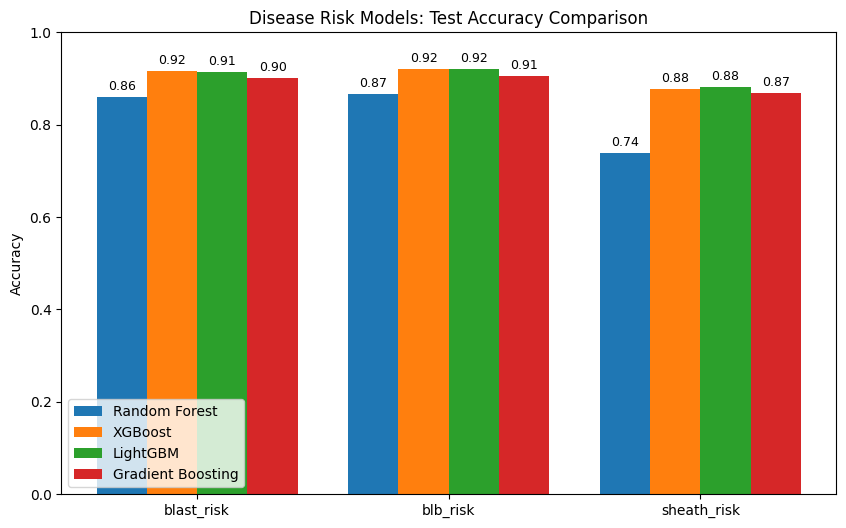

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Diseases and models
diseases = ['blast_risk', 'blb_risk', 'sheath_risk']
models = ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']

# Accuracy values
accuracy_values = {
    'blast_risk': [0.8589, 0.9154, 0.9146, 0.9017],
    'blb_risk': [0.8666, 0.9198, 0.9194, 0.9050],
    'sheath_risk': [0.7392, 0.8780, 0.8815, 0.8685]
}

# Plot
x = np.arange(len(diseases))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))

for i, model in enumerate(models):
    acc = [accuracy_values[d][i] for d in diseases]
    bars = ax.bar(x + i*width - width*1.5, acc, width, label=model)
    
    # Annotate accuracy on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(diseases)
ax.set_ylabel('Accuracy')
ax.set_title('Disease Risk Models: Test Accuracy Comparison')
ax.set_ylim(0,1)
ax.legend()
plt.show()


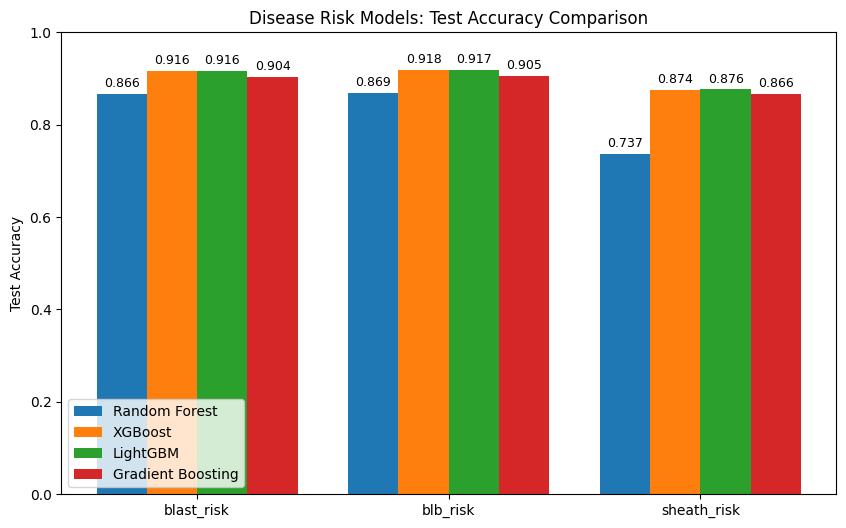

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Diseases and models
diseases = ['blast_risk', 'blb_risk', 'sheath_risk']
models = ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']

# Test Accuracy values from your table
test_accuracy_values = {
    'blast_risk': [0.8661, 0.9158, 0.9158, 0.9037],
    'blb_risk': [0.8687, 0.9177, 0.9173, 0.9048],
    'sheath_risk': [0.7373, 0.8740, 0.8759, 0.8657]
}

# Plot
x = np.arange(len(diseases))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))

for i, model in enumerate(models):
    acc = [test_accuracy_values[d][i] for d in diseases]
    bars = ax.bar(x + i*width - width*1.5, acc, width, label=model)
    
    # Annotate accuracy on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(diseases)
ax.set_ylabel('Test Accuracy')
ax.set_title('Disease Risk Models: Test Accuracy Comparison')
ax.set_ylim(0,1)
ax.legend()
plt.show()


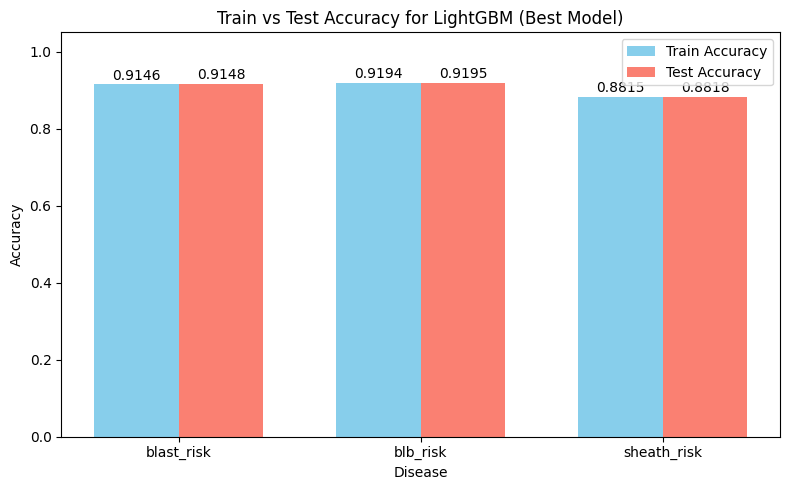

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Diseases
diseases = ['blast_risk', 'blb_risk', 'sheath_risk']

# Train and test accuracy for LightGBM (best model)
train_acc = [0.9146, 0.9194, 0.8815]
test_acc = [0.9148, 0.9195, 0.8818]

x = np.arange(len(diseases))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, train_acc, width, label='Train Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='salmon')

# Add text labels on top
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Disease')
ax.set_title('Train vs Test Accuracy for LightGBM (Best Model)')
ax.set_xticks(x)
ax.set_xticklabels(diseases)
ax.set_ylim(0, 1.05)
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
joblib.dump(LGBMClassifier, f"../../models/disease_risk/{disease}_lightgbm_model.pkl")
joblib.dump(XGBClassifier, f"../../models/disease_risk/{disease}_XGBClassifier.pkl")
joblib.dump(GradientBoostingClassifier, f"../../models/disease_risk/{disease}_GradientBoostingClassifier.pkl")

joblib.dump(scaler, f"../../models/disease_risk/{disease}_scaler.pkl")

['../../models/disease_risk/sheath_risk_scaler.pkl']

: 

In [18]:
from sklearn.preprocessing import LabelEncoder

# List of numeric features
numeric_cols = [
    'tp_mm', 't2m_C', 'anomaly_T2m_C',
    'tp_7d_cum', 'tp_14d_cum', 'tp_7d_avg',
    'consec_rain_days', 'tp_lag1', 'tp_lag3', 'tp_lag7',
    'ph', 'organic_matter', 'total_nitrogen', 'potassium', 'p2o5',
    'boron', 'zinc', 'sand', 'clay', 'slit',
    'UREA2', 'UREA3', 'organic', 'boron_fert'
]

targets = ['UREA1', 'DAP', 'MOP']

# Encode categorical targets
df_encoded = df.copy()
for t in ['blast_risk', 'blb_risk', 'sheath_risk']:
    le = LabelEncoder()
    df_encoded[t] = le.fit_transform(df_encoded[t])

# Compute correlations
for target in targets:
    corr = df_encoded[numeric_cols + [target]].corr()[target].drop(target)
    top5 = corr.abs().sort_values(ascending=False).head(5)
    print(f"\nTop 5 features most correlated with {target}:")
    print(top5)


Top 5 features most correlated with UREA1:
UREA3             0.713123
UREA2             0.713123
p2o5              0.620923
clay              0.553921
total_nitrogen    0.430486
Name: UREA1, dtype: float64

Top 5 features most correlated with DAP:
p2o5     0.701886
slit     0.638210
clay     0.516020
boron    0.492258
zinc     0.453570
Name: DAP, dtype: float64

Top 5 features most correlated with MOP:
UREA3    0.614771
UREA2    0.614771
slit     0.522884
sand     0.454006
boron    0.404884
Name: MOP, dtype: float64


In [17]:
| Feature       | Correlation |
| ------------- | ----------- |
| t2m_C         | 0.3707      |
| anomaly_T2m_C | 0.3707      |
| tp_14d_cum    | 0.3399      |
| tp_7d_avg     | 0.2689      |
| tp_7d_cum     | 0.2689      |


SyntaxError: invalid syntax (86062329.py, line 1)

Heat Stress (heat_proxy)

| Feature       | Correlation |
| ------------- | ----------- |
| t2m_C         | 0.3707      |
| anomaly_T2m_C | 0.3707      |
| tp_14d_cum    | 0.3399      |
| tp_7d_avg     | 0.2689      |
| tp_7d_cum     | 0.2689      |


Blast Risk (blast_risk)

| Feature       | Correlation |
| ------------- | ----------- |
| t2m_C         | 0.0766      |
| anomaly_T2m_C | 0.0766      |
| UREA1         | 0.0561      |
| p2o5          | 0.0510      |
| zinc          | 0.0401      |


Bacterial Leaf Blight Risk (blb_risk)

| Feature       | Correlation |
| ------------- | ----------- |
| t2m_C         | 0.0930      |
| anomaly_T2m_C | 0.0930      |
| UREA1         | 0.0652      |
| p2o5          | 0.0511      |
| UREA3         | 0.0481      |


Sheath Blight Risk (sheath_risk)

| Feature       | Correlation |
| ------------- | ----------- |
| tp_7d_avg     | 0.4483      |
| tp_7d_cum     | 0.4483      |
| tp_14d_cum    | 0.3913      |
| tp_lag3       | 0.3792      |
| anomaly_T2m_C | 0.2951      |


UREA1

| Feature        | Correlation |
| -------------- | ----------- |
| UREA3          | 0.7131      |
| UREA2          | 0.7131      |
| p2o5           | 0.6209      |
| clay           | 0.5539      |
| total_nitrogen | 0.4305      |


DAP

| Feature | Correlation |
| ------- | ----------- |
| p2o5    | 0.7019      |
| slit    | 0.6382      |
| clay    | 0.5160      |
| boron   | 0.4923      |
| zinc    | 0.4536      |


MOP

| Feature | Correlation |
| ------- | ----------- |
| UREA3   | 0.6148      |
| UREA2   | 0.6148      |
| slit    | 0.5229      |
| sand    | 0.4540      |
| boron   | 0.4049      |
